In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [40]:
# 1)
G = 6.67*10**(-11) # m^3/kg*s^2 Newtonian Grav
me = 5.97219*10**24 #kg Earth Mass
mm = 7.34767309*10**22 # kg Moon Mass
re = 6.371e6 # m Earth Radius
rm = 1.74e6 # m Moon Radius
rem = 3.84e8 # m Earth to Moon radius
mr = 10000 #kg

In [41]:
#def TE(t,state,G,me,mm,re,rm,rem,mr):
#    x,v = state
#    dx_dt = v
#    unet = (G*mm)/(x+re)**2 + (-G*m|e)/(rem-x)**2
#    KE = 0.5*mr*(v)**2
#    dv_dt = (unet + KE)*x
#    return [dx_dt,dv_dt]
    
def state1(t,state,mr,G,mm,me,rem): # Solving for position and velocity(measuring in one dimension)
    x,v = state 
    dx_dt = v
    dv_dt = ((G*mm)/(x**2) + (-G*me)/(rem-x)**2)
    return [dx_dt,dv_dt]

# UE = -((G*me*mr)/(x+re) + (G*mm*mr)/(rm + rem)) UNET
# KE = 0.5mv^2 -> 0.5*m*dx/dt^2 KNET 

In [42]:
tspan = [0,25920]
xo = re + 50.0e3
vo = 12e3
dt = np.arange(0,25920,1000)
sol = solve_ivp(state1, tspan, [xo,vo], args = (mr,G,mm,me,rem,), method="RK45", t_eval = dt,dense_output=True)

In [43]:
print(len(sol.t)) # Length of time value array
print(len(sol.y[1])) # Length of force value array -> same as veloicty array

26
26


In [44]:
print(sol)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [    0  1000 ... 24000 25000]
        y: [[ 6.421e+06  1.845e+07 ...  2.940e+08  3.058e+08]
            [ 1.200e+04  1.204e+04 ...  1.178e+04  1.172e+04]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x00000191F9DB8D10>
 t_events: None
 y_events: None
     nfev: 44
     njev: 0
      nlu: 0


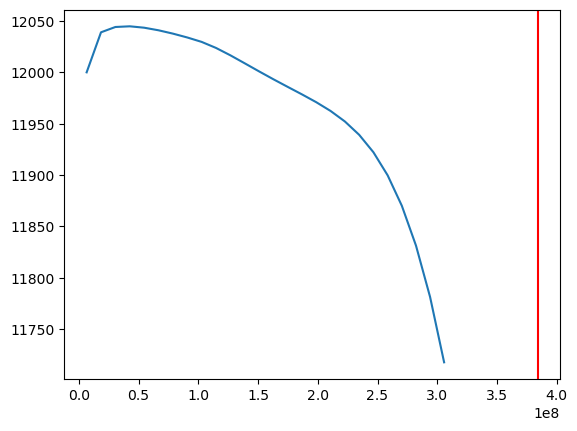

In [45]:
plt.plot(sol.y[0],sol.y[1])
plt.axvline(rem, color = 'red', label = 'Moon Reached')

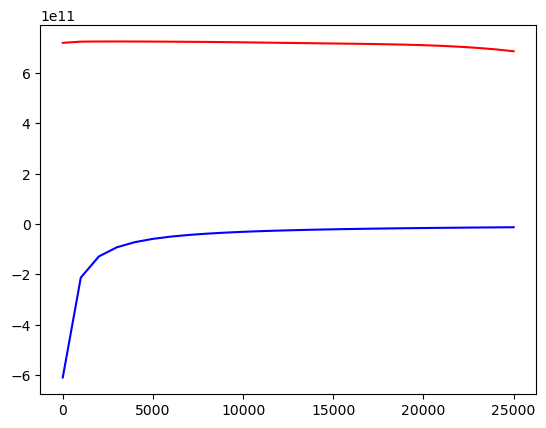

In [46]:
KE =  0.5*mr*(sol.y[1])**2
PE = -((G*me*mr)/(sol.y[0]) + (G*mm*mr)/(rm - sol.y[0])) 
#plt.plot(PE)
plt.plot(sol.t,KE,color='red')
plt.plot(sol.t,PE,color='blue')

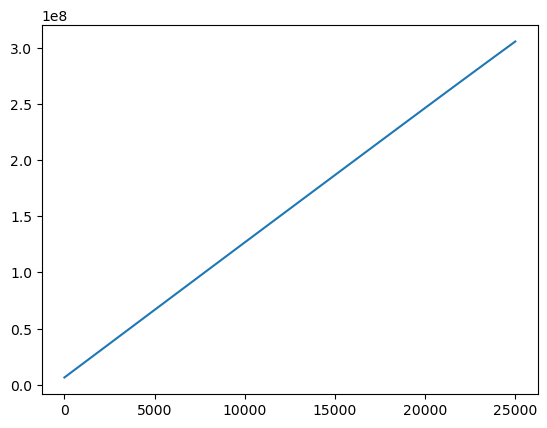

In [47]:
plt.plot(sol.t,sol.y[0])

In [48]:
# 2)
m = 80
L = 4.0
g = 9.8

In [49]:
def swing(t,state,m,L,g):
    theta,w = state
    dtheta_dt = w
    dw_dt = (-m*g*L*np.sin(theta))/(m*L**2)
    
    return [dtheta_dt,dw_dt]

In [50]:
wO = np.sqrt(g/L)
thetaO = np.radians(90)
tspan1 = [1,2.5/(wO/(2*np.pi))]

In [51]:
sol1 = solve_ivp(swing, tspan1, [thetaO,wO], args=(m,L,g), method="RK45", dense_output=True)

In [52]:
print(sol1)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 1.000e+00  1.095e+00 ...  1.003e+01  1.004e+01]
        y: [[ 1.571e+00  1.708e+00 ... -2.081e+00 -2.079e+00]
            [ 1.565e+00  1.334e+00 ...  1.948e-01  2.071e-01]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x00000191FA8E9F10>
 t_events: None
 y_events: None
     nfev: 122
     njev: 0
      nlu: 0


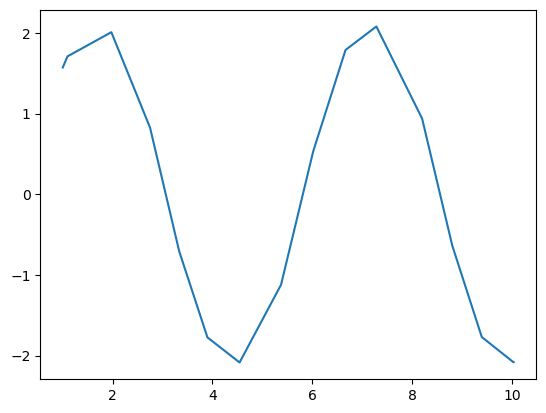

In [53]:
plt.plot(sol1.t,sol1.y[0])

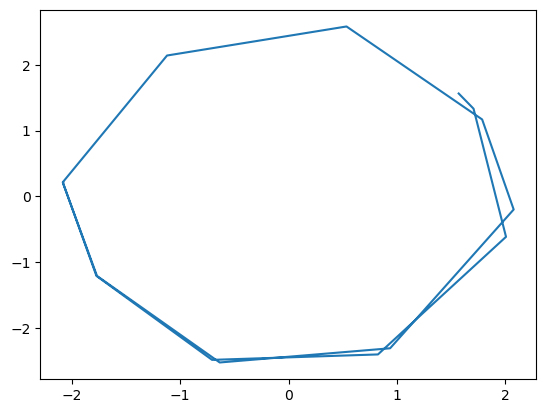

In [54]:
plt.plot(sol1.y[0],sol1.y[1])

In [9]:
# 3) 
qe = -1.60217663e-19
me = 9.1093837e-31
Be = 50e-6
Re = 6378e3
v0 = 300.0e3
re = 6.371e6 # m Earth Radius

In [10]:
def NL(t,state,qe,me,Be,Re,v0):
    x,y,z,vx,vy,vz = state
    Bx = 0.0
    By = 0.0
    Bz = -Be*(Re/z)**3
    
    dxdt = vx
    dydt = vy
    dzdt = vz
    dvxdt = (qe/me)*(vy*Bz - vz*By)
    dvydt = (qe/me)*(vz*Bx - vx*Bz)
    dvzdt = (qe/me)*(vx*By - vy*Bx)
    return [dxdt,dydt,dzdt,dvxdt,dvydt,dvzdt]

In [ ]:
xo = 0.0
yo = 0.0
zo=10.0*re
vxo=v0
vyo = 0
vzo = -v0
tspan2 = [0,240]
dt2 = np.arange(0,240,1)
sol2 = solve_ivp(NL,tspan2,[xo,yo,zo,vxo,vyo,vzo],args=(qe,me,Be,Re,v0,),method = "RK45",t_eval=dt2,dense_output=True)

In [ ]:
print(sol2)

In [ ]:
plt.plot(sol2.t,sol2.y[3])

In [ ]:
plt.plot(sol2.t,sol2.y[4])

In [ ]:
plt.plot(sol2.t,sol2.y[5])